В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR)

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = datasets.fetch_california_housing(as_frame=True).frame

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Проверьте данные на наличие пропусков. Удалите их в случае обнаружения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков в данных нет

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [5]:
# сделаем функцию, чтобы считать модель линейной регрессии, метрики RMSE, R2 на обучающем и тестовом множестве

In [6]:
def metrics(X, y, random_seed=0, test_size=0.2):
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    print('Mean squared error regression loss train: ', rmse_train)
    print('Regression score function train: ', r2_train)
    print('Mean squared error regression loss test:', rmse_test)
    print('Regression score function test: ', r2_test)
    return rmse_train, r2_train, rmse_test, r2_test

In [7]:
X = data.loc[:, data.columns != 'MedHouseVal']
y = data[['MedHouseVal']]
rmsetrain, r2train, rmsetest, r2test = metrics(X, y)
d1 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ] 

# With two column indices, values same 
# as dictionary keys 


Mean squared error regression loss train:  0.7234924745376036
Regression score function train:  0.6088968118672868
Mean squared error regression loss test: 0.7273129773603124
Regression score function test:  0.594323265246619


In [8]:
dframe1 = pd.DataFrame(d1, index =['исходная модель'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ]) 
dframe1


,rmse_train,r2train,rmsetest,r2test
исходная модель,0.723492,0.608897,0.727313,0.594323


Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

<Axes: >

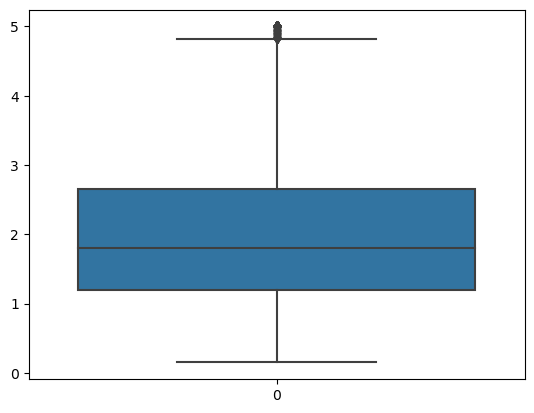

In [9]:
sns.boxplot(data['MedHouseVal'])

выбросы есть

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных

<Axes: >

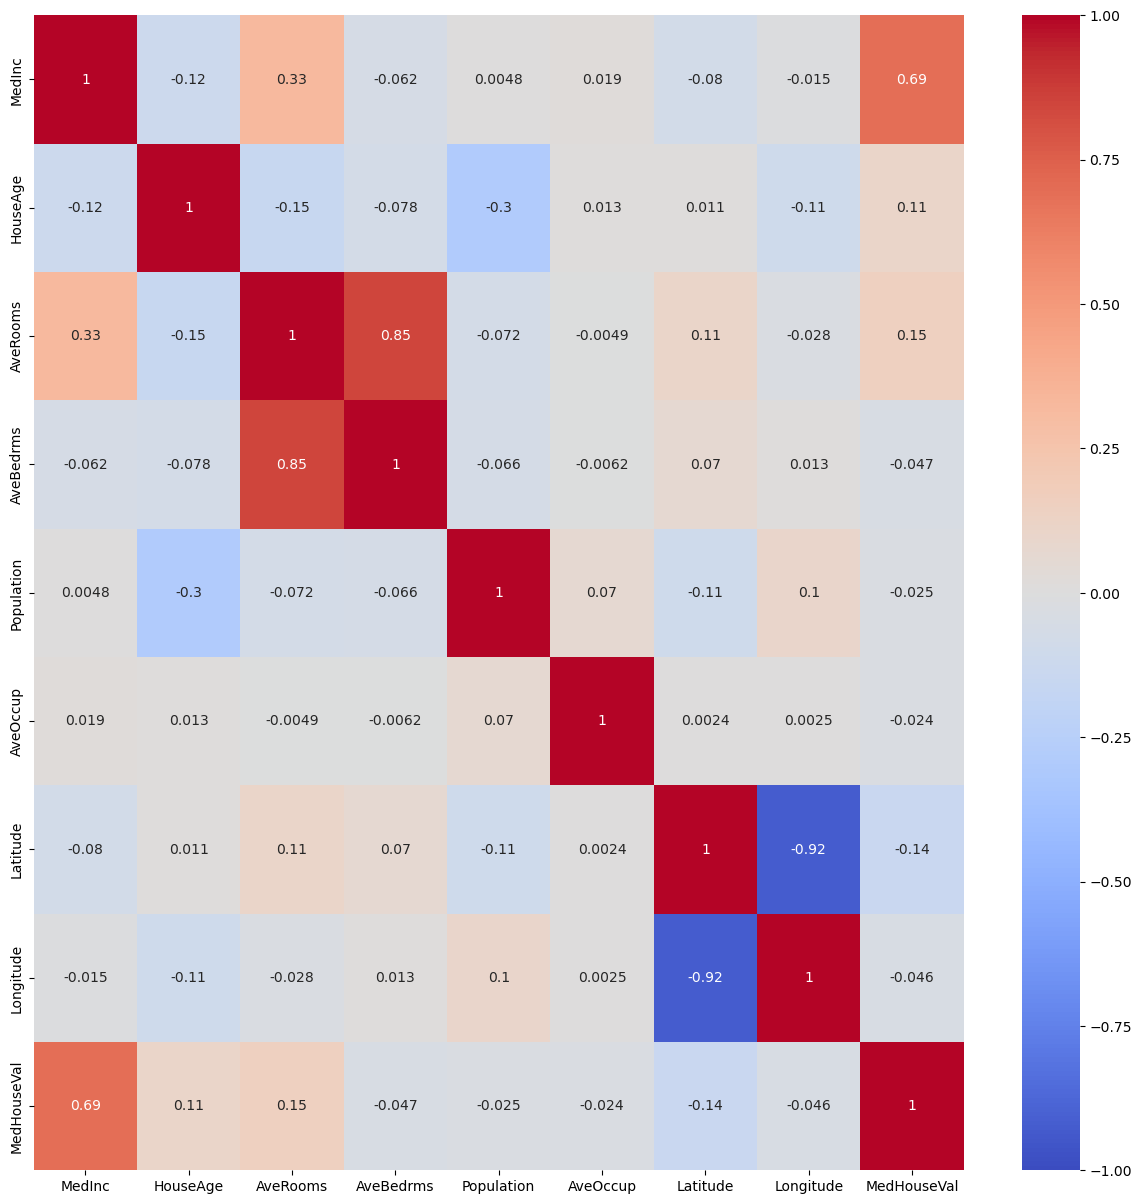

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm',ax=ax)

In [11]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


a. Cильная корреляция 0.85 между признаками AveRooms и AveBedrms
b. Удаляем признак AveBedrms

In [12]:
X2 = data.loc[:, (data.columns != 'MedHouseVal')&(data.columns != 'AveBedrms')]
y2 = data[['MedHouseVal']]
rmsetrain, r2train, rmsetest, r2test = metrics(X2, y2)
d2 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ]

Mean squared error regression loss train:  0.7314188174268145
Regression score function train:  0.6002802761968508
Mean squared error regression loss test: 0.7414501124382492
Regression score function test:  0.5783993232750757


In [13]:
dframe2 = pd.DataFrame(d2, index =['удаление корреляции'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ])
itog = pd.concat([dframe1, dframe2])
itog

,rmse_train,r2train,rmsetest,r2test
исходная модель,0.723492,0.608897,0.727313,0.594323
удаление корреляции,0.731419,0.600280,0.741450,0.578399


качество модели не улучшилось

Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.

In [14]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   Population  20640 non-null  float64
 4   AveOccup    20640 non-null  float64
 5   Latitude    20640 non-null  float64
 6   Longitude   20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


<Axes: >

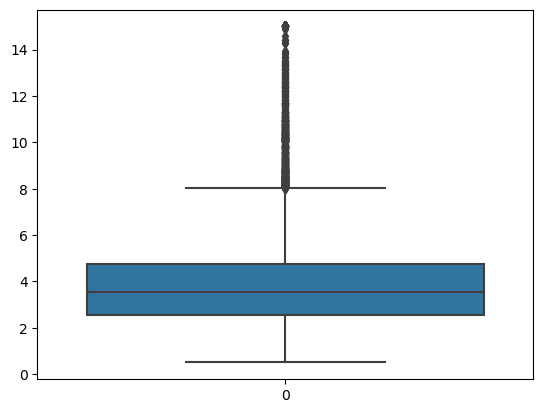

In [15]:
sns.boxplot(X2['MedInc'])

<Axes: >

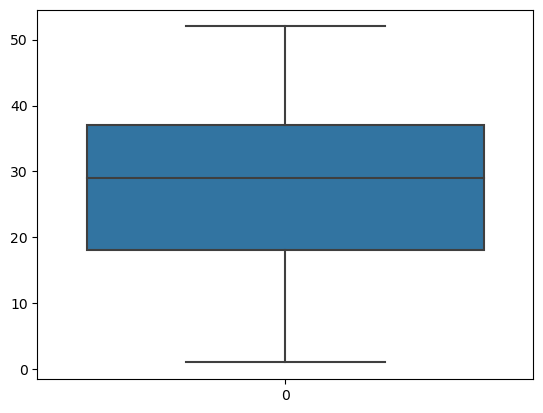

In [16]:
sns.boxplot(X2['HouseAge'])

<Axes: >

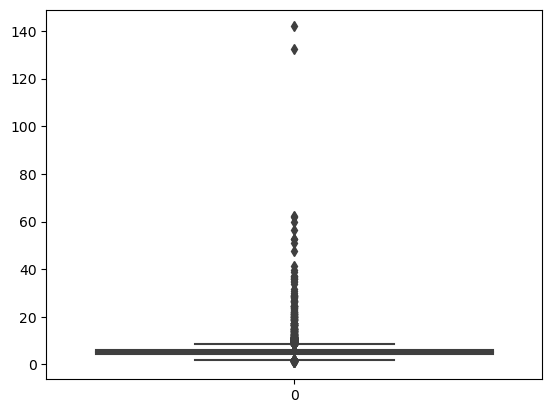

In [17]:
sns.boxplot(X2['AveRooms'])

<Axes: >

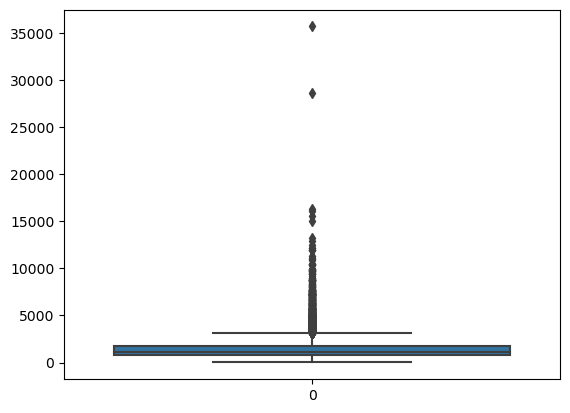

In [18]:
sns.boxplot(X2['Population'])

<Axes: >

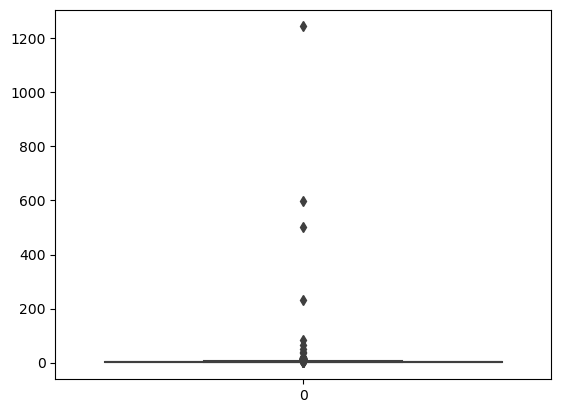

In [19]:
sns.boxplot(X2['AveOccup'])

Видно, что выбросы есть везде, но только у одной переменной можно проигнорировть - возраст дома
 :Attribute Information:
 - MedInc редний доход MedInc в группе 
 - HouseAge возраст дома
 - AveRooms среднее кол-во комнат на семью
 - AveBedrms среднее кол-во спален на семью
 - Population - кол-во людей в блоке
 - AveOccup среднее количество членов домохозяйства в среднем
 - Latitude block group latitude
 - Longitude block group longitude

In [20]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
# начнем удалять выбросы
t = data[(data['AveRooms']<10)&(data['Population']<5000)&(data['AveOccup']<5)]

In [23]:
t.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19782.000000,19782.000000,19782.000000,19782.000000,19782.000000,19782.000000,19782.00000,19782.000000,19782.000000
mean,3.873599,28.954757,5.282674,1.065978,1343.162572,2.874721,35.63928,-119.594788,2.079858
std,1.896208,12.487941,1.221182,0.128059,820.890245,0.671034,2.13548,2.006852,1.159505
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.54000,-124.350000,0.149990
25%,2.563925,19.000000,4.444444,1.004916,789.000000,2.424448,33.93000,-121.820000,1.194000
50%,3.538500,29.000000,5.221196,1.047775,1157.000000,2.807229,34.26000,-118.510000,1.815000
75%,4.751125,37.000000,6.017661,1.096988,1688.750000,3.251288,37.72000,-118.020000,2.667000
max,15.000100,52.000000,9.979167,3.411111,4992.000000,4.995816,41.95000,-114.550000,5.000010


In [24]:
X3 = t.loc[:, (t.columns != 'MedHouseVal')&(t.columns != 'AveBedrms')]
y3 = t[['MedHouseVal']]
rmsetrain, r2train, rmsetest, r2test = metrics(X3, y3)
d3 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ]
dframe3 = pd.DataFrame(d3, index =['удаление выбросов'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ]) 
itog = pd.concat([dframe1, dframe2, dframe3])
itog

Mean squared error regression loss train:  0.6723822845613345
Regression score function train:  0.6658289258914594
Mean squared error regression loss test: 0.6625870081878683
Regression score function test:  0.6648591011855207


,rmse_train,r2train,rmsetest,r2test
исходная модель,0.723492,0.608897,0.727313,0.594323
удаление корреляции,0.731419,0.600280,0.741450,0.578399
удаление выбросов,0.672382,0.665829,0.662587,0.664859


RMSE стала хуже, а вот R2 стала заметно лучше

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [25]:
# сделаем нормализацию по двум колонкам Population, AveOccup
temp = t.copy()
x = temp.iloc [:,0:3]
temp.iloc [:,0:3] = (x-x. min ())/ (x. max () - x. min ())
temp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.672064,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,0.538027,0.392157,0.590384,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,0.466028,1.000000,0.814844,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,0.354699,1.000000,0.544311,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,0.230776,1.000000,0.595170,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
X4 = temp.loc[:, (t.columns != 'MedHouseVal')&(t.columns != 'AveBedrms')]
y4 = temp[['MedHouseVal']]
rmsetrain, r2train, rmsetest, r2test = metrics(X4, y4)
d4 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ]
dframe4 = pd.DataFrame(d4, index =['нормализация'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ]) 
itog = pd.concat([dframe1, dframe2, dframe3, dframe4])
itog

Mean squared error regression loss train:  0.6723822845613345
Regression score function train:  0.6658289258914594
Mean squared error regression loss test: 0.6625870081878671
Regression score function test:  0.6648591011855218


,rmse_train,r2train,rmsetest,r2test
исходная модель,0.723492,0.608897,0.727313,0.594323
удаление корреляции,0.731419,0.600280,0.741450,0.578399
удаление выбросов,0.672382,0.665829,0.662587,0.664859
нормализация,0.672382,0.665829,0.662587,0.664859


Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [27]:

from sklearn.preprocessing import Normalizer
X5 = data.loc[:, (data.columns != 'MedHouseVal')&(data.columns != 'AveBedrms')]
y5 = data[['MedHouseVal']]
transformer = Normalizer().fit(X5)
transformer
transformer.transform(X5)

array([[ 0.02384821,  0.11744781,  0.0200066 , ...,  0.0073206 ,
         0.10851032, -0.3501377 ],
       [ 0.00345241,  0.00873355,  0.00259434, ...,  0.00087745,
         0.01574533, -0.05082923],
       [ 0.01409205,  0.10097098,  0.01609348, ...,  0.00544129,
         0.07349522, -0.23735947],
       ...,
       [ 0.00167455,  0.01674554,  0.00512762, ...,  0.00229082,
         0.0388398 , -0.11940554],
       [ 0.00248252,  0.02393171,  0.0070858 , ...,  0.00282289,
         0.05242375, -0.16129975],
       [ 0.00171478,  0.0114864 ,  0.00377236, ...,  0.00187873,
         0.02826372, -0.0870382 ]])

In [28]:
rmsetrain, r2train, rmsetest, r2test = metrics(X5, y5)
d5 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ] 
dframe5 = pd.DataFrame(d5, index =['Normalizer sklearn без удаление выбросов'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ]) 
itog = pd.concat([dframe1, dframe2, dframe3, dframe4, dframe5])
itog

Mean squared error regression loss train:  0.7314188174268145
Regression score function train:  0.6002802761968508
Mean squared error regression loss test: 0.7414501124382492
Regression score function test:  0.5783993232750757


,rmse_train,r2train,rmsetest,r2test
исходная модель,0.723492,0.608897,0.727313,0.594323
удаление корреляции,0.731419,0.600280,0.741450,0.578399
удаление выбросов,0.672382,0.665829,0.662587,0.664859
нормализация,0.672382,0.665829,0.662587,0.664859
Normalizer sklearn без удаление выбросов,0.731419,0.600280,0.741450,0.578399


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X6 = data.loc[:, (data.columns != 'MedHouseVal')&(data.columns != 'AveBedrms')]
y6 = data[['MedHouseVal']]
X6 = scaler.fit_transform(X6)

rmsetrain, r2train, rmsetest, r2test = metrics(X6, y6)
d6 = [{'rmse_train': rmsetrain , 'r2train': r2train, 'rmsetest': rmsetest, 'r2test': r2test} ] 
dframe6 = pd.DataFrame(d6, index =['StandardScaler sklearn без удаление выбросов'], columns =['rmse_train', 'r2train', 'rmsetest', 'r2test' ]) 
itog = pd.concat([dframe1, dframe2, dframe3, dframe4, dframe5, dframe6])
itog = itog.sort_values (by = ['r2train', 'r2test'], ascending=False)
itog

Mean squared error regression loss train:  0.7314188174268145
Regression score function train:  0.6002802761968508
Mean squared error regression loss test: 0.7414501124382501
Regression score function test:  0.5783993232750746


,rmse_train,r2train,rmsetest,r2test
нормализация,0.672382,0.665829,0.662587,0.664859
удаление выбросов,0.672382,0.665829,0.662587,0.664859
исходная модель,0.723492,0.608897,0.727313,0.594323
удаление корреляции,0.731419,0.600280,0.741450,0.578399
Normalizer sklearn без удаление выбросов,0.731419,0.600280,0.741450,0.578399
StandardScaler sklearn без удаление выбросов,0.731419,0.600280,0.741450,0.578399


Лучшие результаты по метрикам получились при использовании  инструментов удаление выбросов и нормализации (не встроенные функции)